# ConvNet

In this notebook we will train a ConvNet from scratch to classify Cifar-10 and make some simple investigations. The basic project will involve constructing a baseline network architecture based on the VGG
network to solve the Cifar-10 dataset.

In [ ]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [2]:
num_classes = 10

## Load the data

In [3]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    
    # one hot encode target values
    trainY = to_categorical(trainY, num_classes)
    testY = to_categorical(testY, num_classes)
    
    return trainX, trainY, testX, testY

## Prepare the data

We start by normalizing the pixel from [0,255] to [0,1]:

In [4]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    # return normalized images
    return train_norm, test_norm

## Plot the results

In [5]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    
    # save plot to file
    pyplot.plot()

## Evaluate the model

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # define model
    model = define_model()
    
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
    
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    
    # learning curves
    summarize_diagnostics(history)

## Define the model

### Baseline: 1 VGG Block

In [ ]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

> 66.930


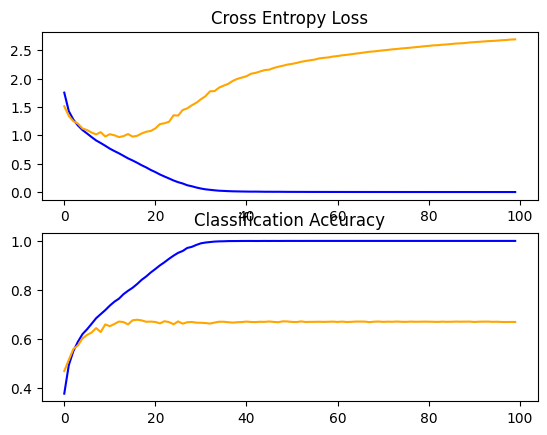

In [ ]:
run_test_harness()

### Baseline: 2 VGG Block

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

> 69.060


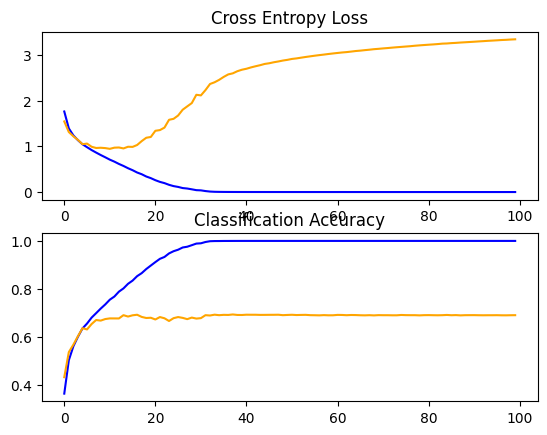

In [ ]:
run_test_harness()

### Baseline: 3 VGG Block

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


> 74.480


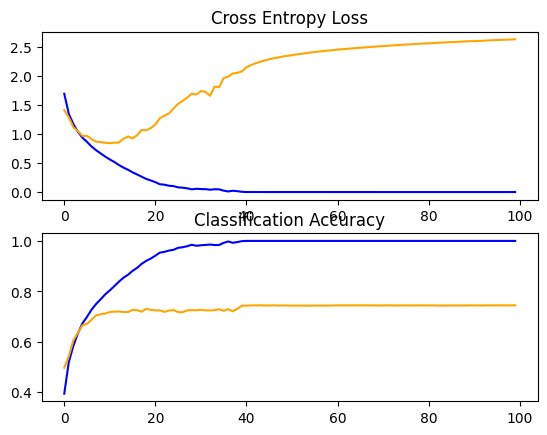

In [ ]:
run_test_harness()

## Regularization

Next, we will explore different types of regularization independently to the network:

### Dropout Regularization

In this case, we will add Dropout layers after each max pooling layer and after the fully connected layer, and use a fixed dropout rate of 20% (e.g. retain 80% of the nodes).

The updated VGG 3 baseline model with dropout is listed below.

In [ ]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
782/782 [==============================] - 18s 11ms/step - loss: 1.9990 - accuracy: 0.2501 - val_loss: 1.7199 - val_accuracy: 0.3917
Epoch 2/100
782/782 [==============================] - 8s 10ms/step - loss: 1.6724 - accuracy: 0.3848 - val_loss: 1.5304 - val_accuracy: 0.4448
Epoch 3/100
782/782 [==============================] - 7s 9ms/step - loss: 1.5323 - accuracy: 0.4377 - val_loss: 1.3882 - val_accuracy: 0.4995
Epoch 4/100
782/782 [==============================] - 8s 10ms/step - loss: 1.4413 - accuracy: 0.4728 - val_loss: 1.3115 - val_accuracy: 0.5261
Epoch 5/100
782/782 [==============================] - 8s 11ms/step - loss: 1.3602 - accuracy: 0.5033 - val_loss: 1.2444 - val_accuracy: 0.5516
Epoch 6/100
782/782 [==============================] - 8s 11ms/step - loss: 1.2877 - accuracy: 0.5334 - val_loss: 1.1776 - val_accuracy: 0.5853
Epoch 7/100
782/782 [==============================] - 8s 10ms/step - loss: 1.2239 - accuracy: 0.5579 - val_loss: 1.0964 - val_accuracy:

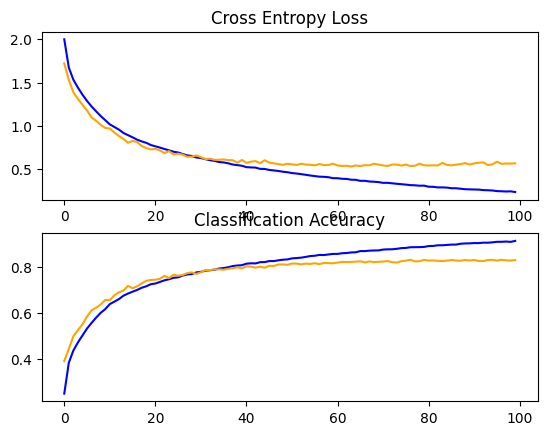

In [ ]:
run_test_harness()

We can see a high improvement in the accuracy to 83%.

## Weight Decay

We can add weight regularization to the convolutional layers and the fully connected layers by defining the “kernel_regularizer” argument and specifying the type of regularization. In this case, we will use L2 weight regularization, the most common type used for neural networks and a sensible default weighting of 0.001.

The updated baseline model with weight decay is listed below.

In [ ]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  # add the weight decay here
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


> 71.730


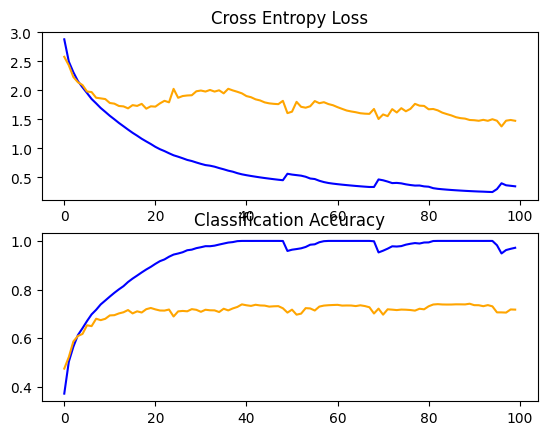

In [ ]:
run_test_harness()

Weight decay, at least for these settings, didn't have any effect on the accuracy.

## Dropout and Data Augmentation and Batch Normalization


We are going to combine different different regularizer and see if a further improvement can be achieved.

In [6]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [7]:
# run the test harness for evaluating a model
def run_test_harness():
 # load dataset
 trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)
 # define model
 model = define_model()

 # Data Augmentation:
 # create data generator
 datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 # prepare iterator
 it_train = datagen.flow(trainX, trainY, batch_size=64)

 # fit model
 steps = int(trainX.shape[0] / 64)
 history = model.fit(it_train, steps_per_epoch=steps, epochs=200, validation_data=(testX, testY), verbose=0)

  # save model
  model.save('final_model.h5')

 # evaluate model
 _, acc = model.evaluate(testX, testY, verbose=0)
 print('> %.3f' % (acc * 100.0))

 # learning curves
 summarize_diagnostics(history)

In [ ]:
run_test_harness()

170498071/170498071 [==============================] - 6s 0us/step


## Evaluate Final Model

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # load model
  model = load_model('final_model.h5')
  # evaluate model on test dataset
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))

In [ ]:
# entry point, run the test harness
run_test_harness()

## Make Prediction

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
 
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, target_size=(32, 32))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 3 channels
 img = img.reshape(1, 32, 32, 3)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img
 
# load an image and predict the class
def run_example():
 # load the image
 img = load_image('sample_image.png')
 # load model
 model = load_model('final_model.h5')
 # predict the class
 result = model.predict_classes(img)
 print(result[0])
 
# entry point, run the example
run_example()